# YOLO11 Box versus Wheel Dataset Training
- by Marcelo Rovai @Sept25

## Verify GPU
 In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon Sep  8 17:37:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="8NEOn2tX76EJbk9hQTb4")
project = rf.workspace("marcelo-rovai-riila").project("box-versus-wheel-auto-dataset")
version = project.version(8)
dataset = version.download("yolov11")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Box-versus-Wheel-auto-dataset-8 in yolov11:: 100%|██████████| 508/508 [00:00<00:00, 10662.60it/s]


## Training

Modify data.yaml with the correct path:

test: /content/datasets/Box-versus-Wheel-auto-dataset-8/test/images

train: /content/datasets/Box-versus-Wheel-auto-dataset-8/train/images

val: /content/datasets/Box-versus-Wheel-auto-dataset-8/valid/images


In [6]:
MODEL = 'yolo11n.pt'
IMG_SIZE = 640
EPOCHS = 25
HALF=True

In [7]:
%cd {HOME}

!yolo task=detect mode=train model={MODEL} data={dataset.location}/data.yaml epochs={EPOCHS} imgsz={IMG_SIZE} plots=True half={HALF}

/content
Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Box-versus-Wheel-auto-dataset-8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml			 labels.jpg	     train_batch227.jpg
BoxF1_curve.png			 results.csv	     train_batch2.jpg
BoxP_curve.png			 results.png	     val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg    val_batch0_pred.jpg
BoxR_curve.png			 train_batch1.jpg    weights
confusion_matrix_normalized.png  train_batch225.jpg
confusion_matrix.png		 train_batch226.jpg


/content


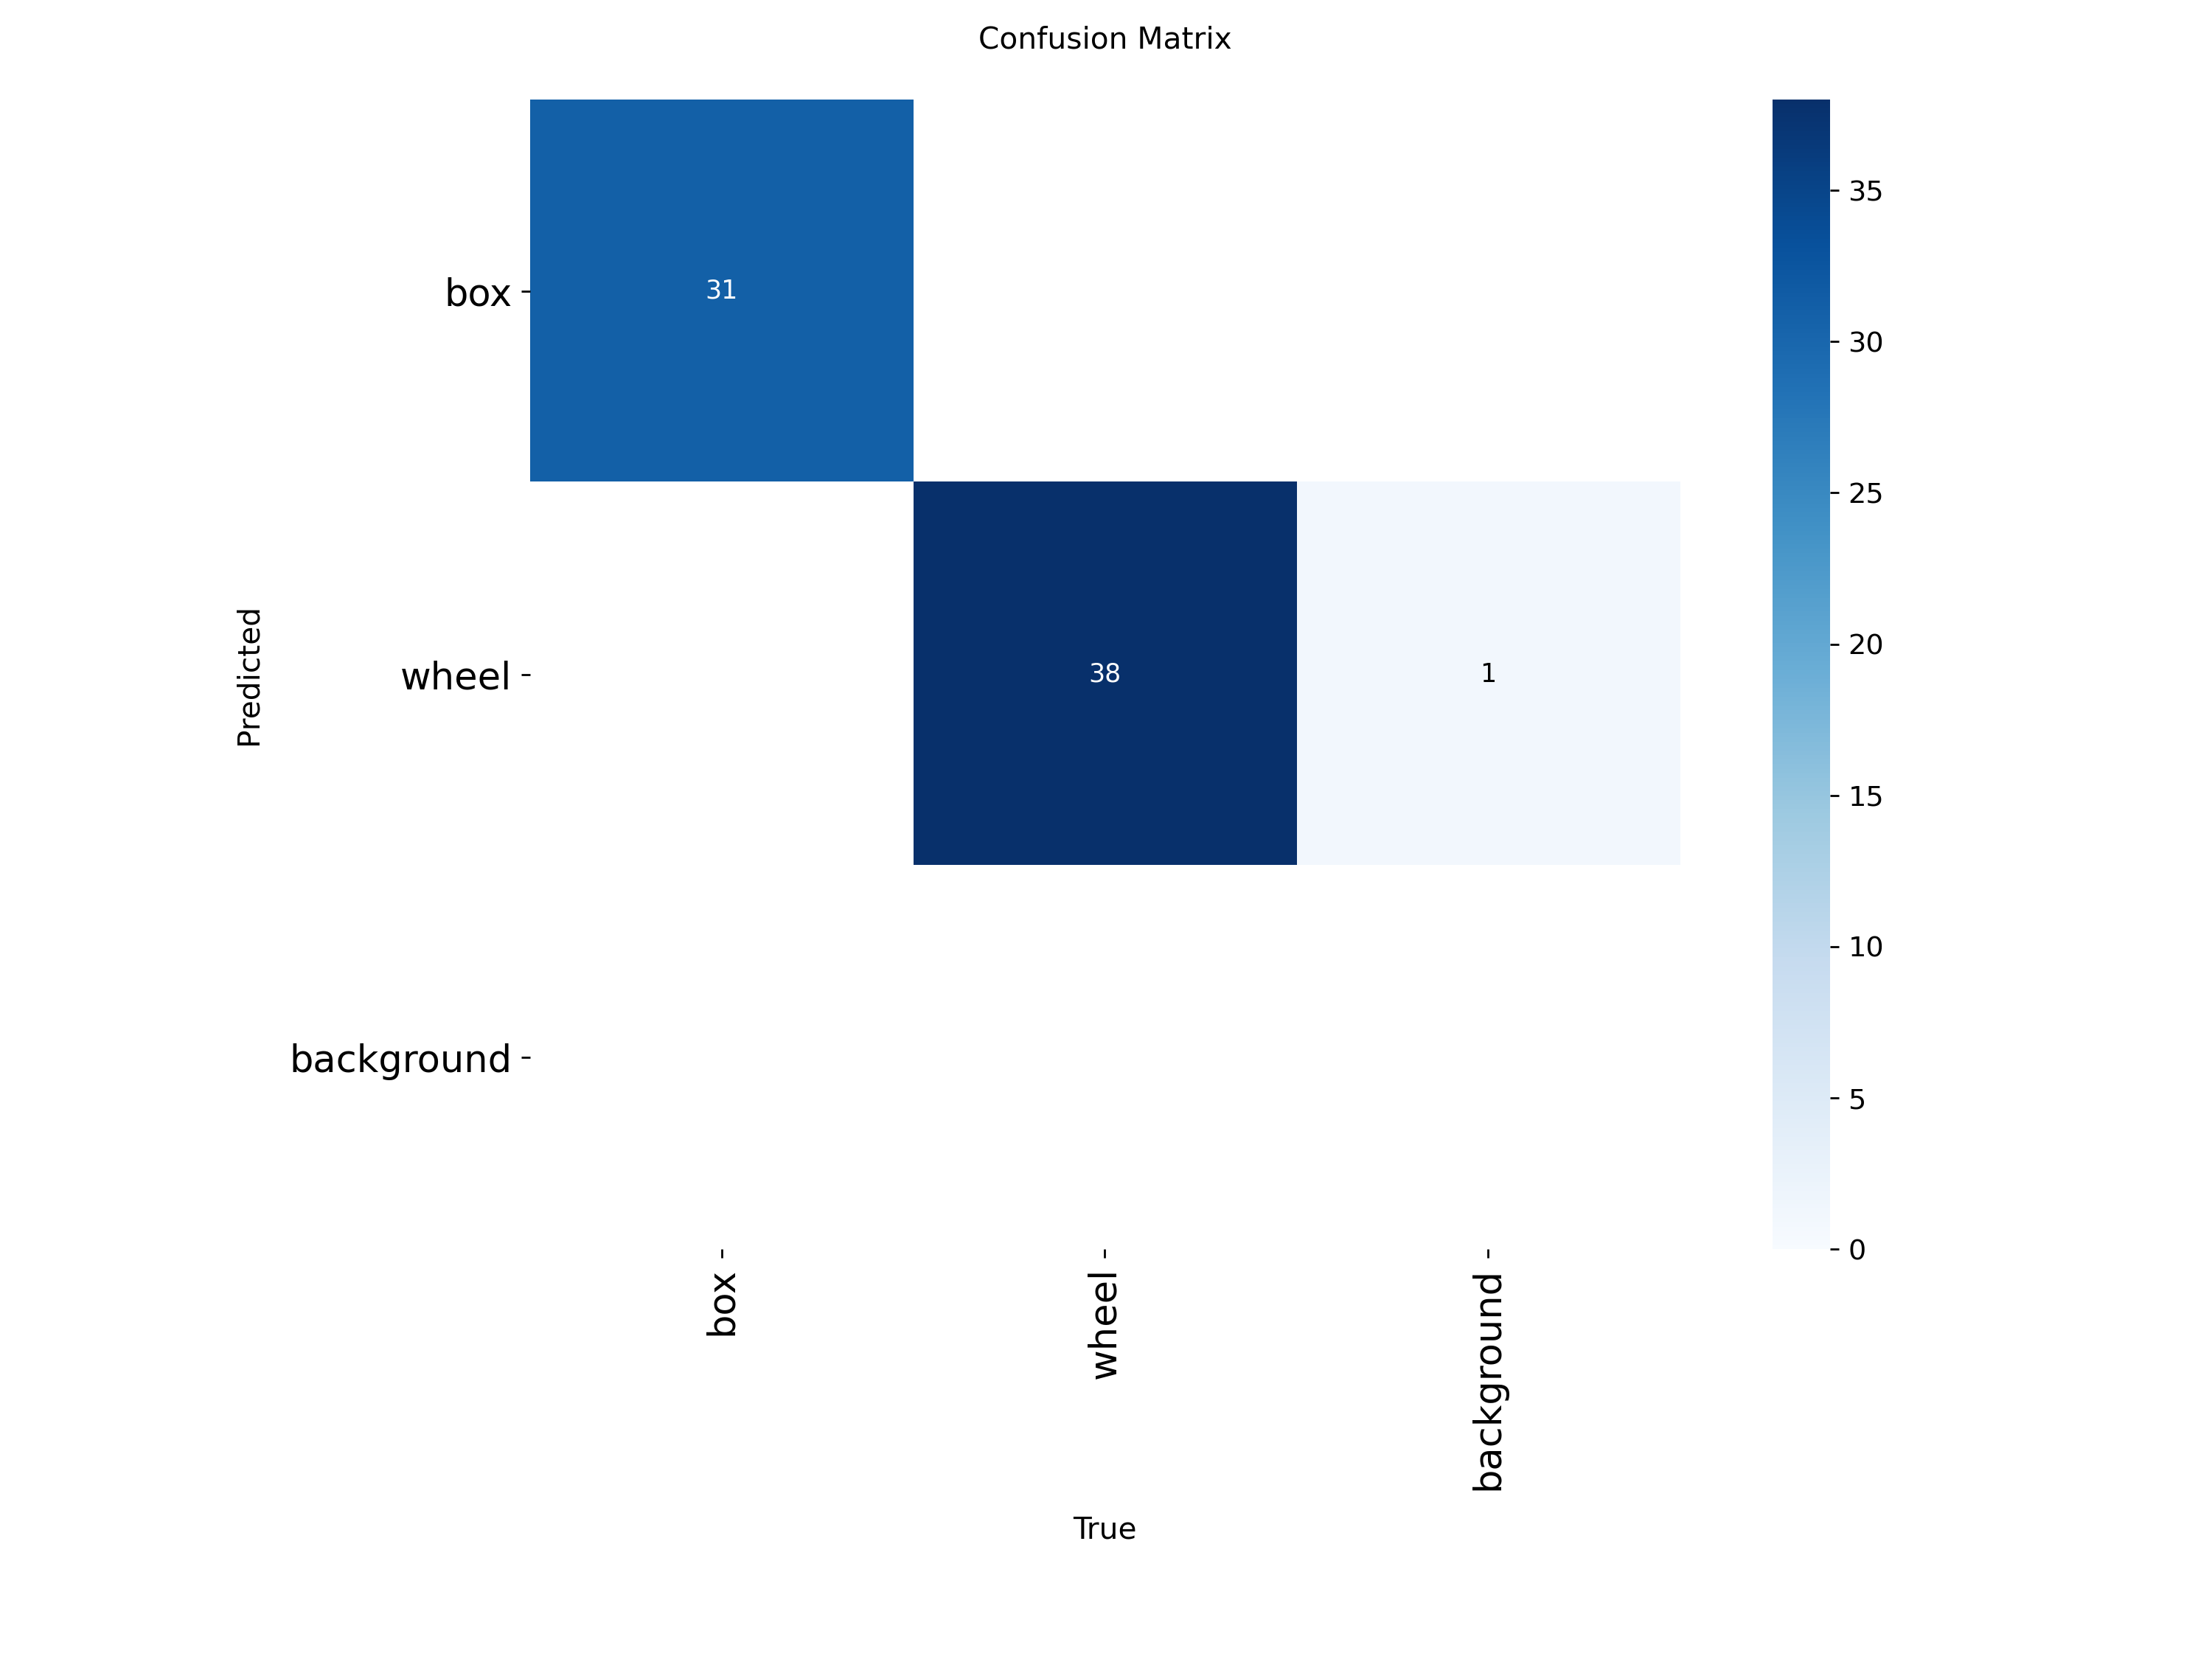

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


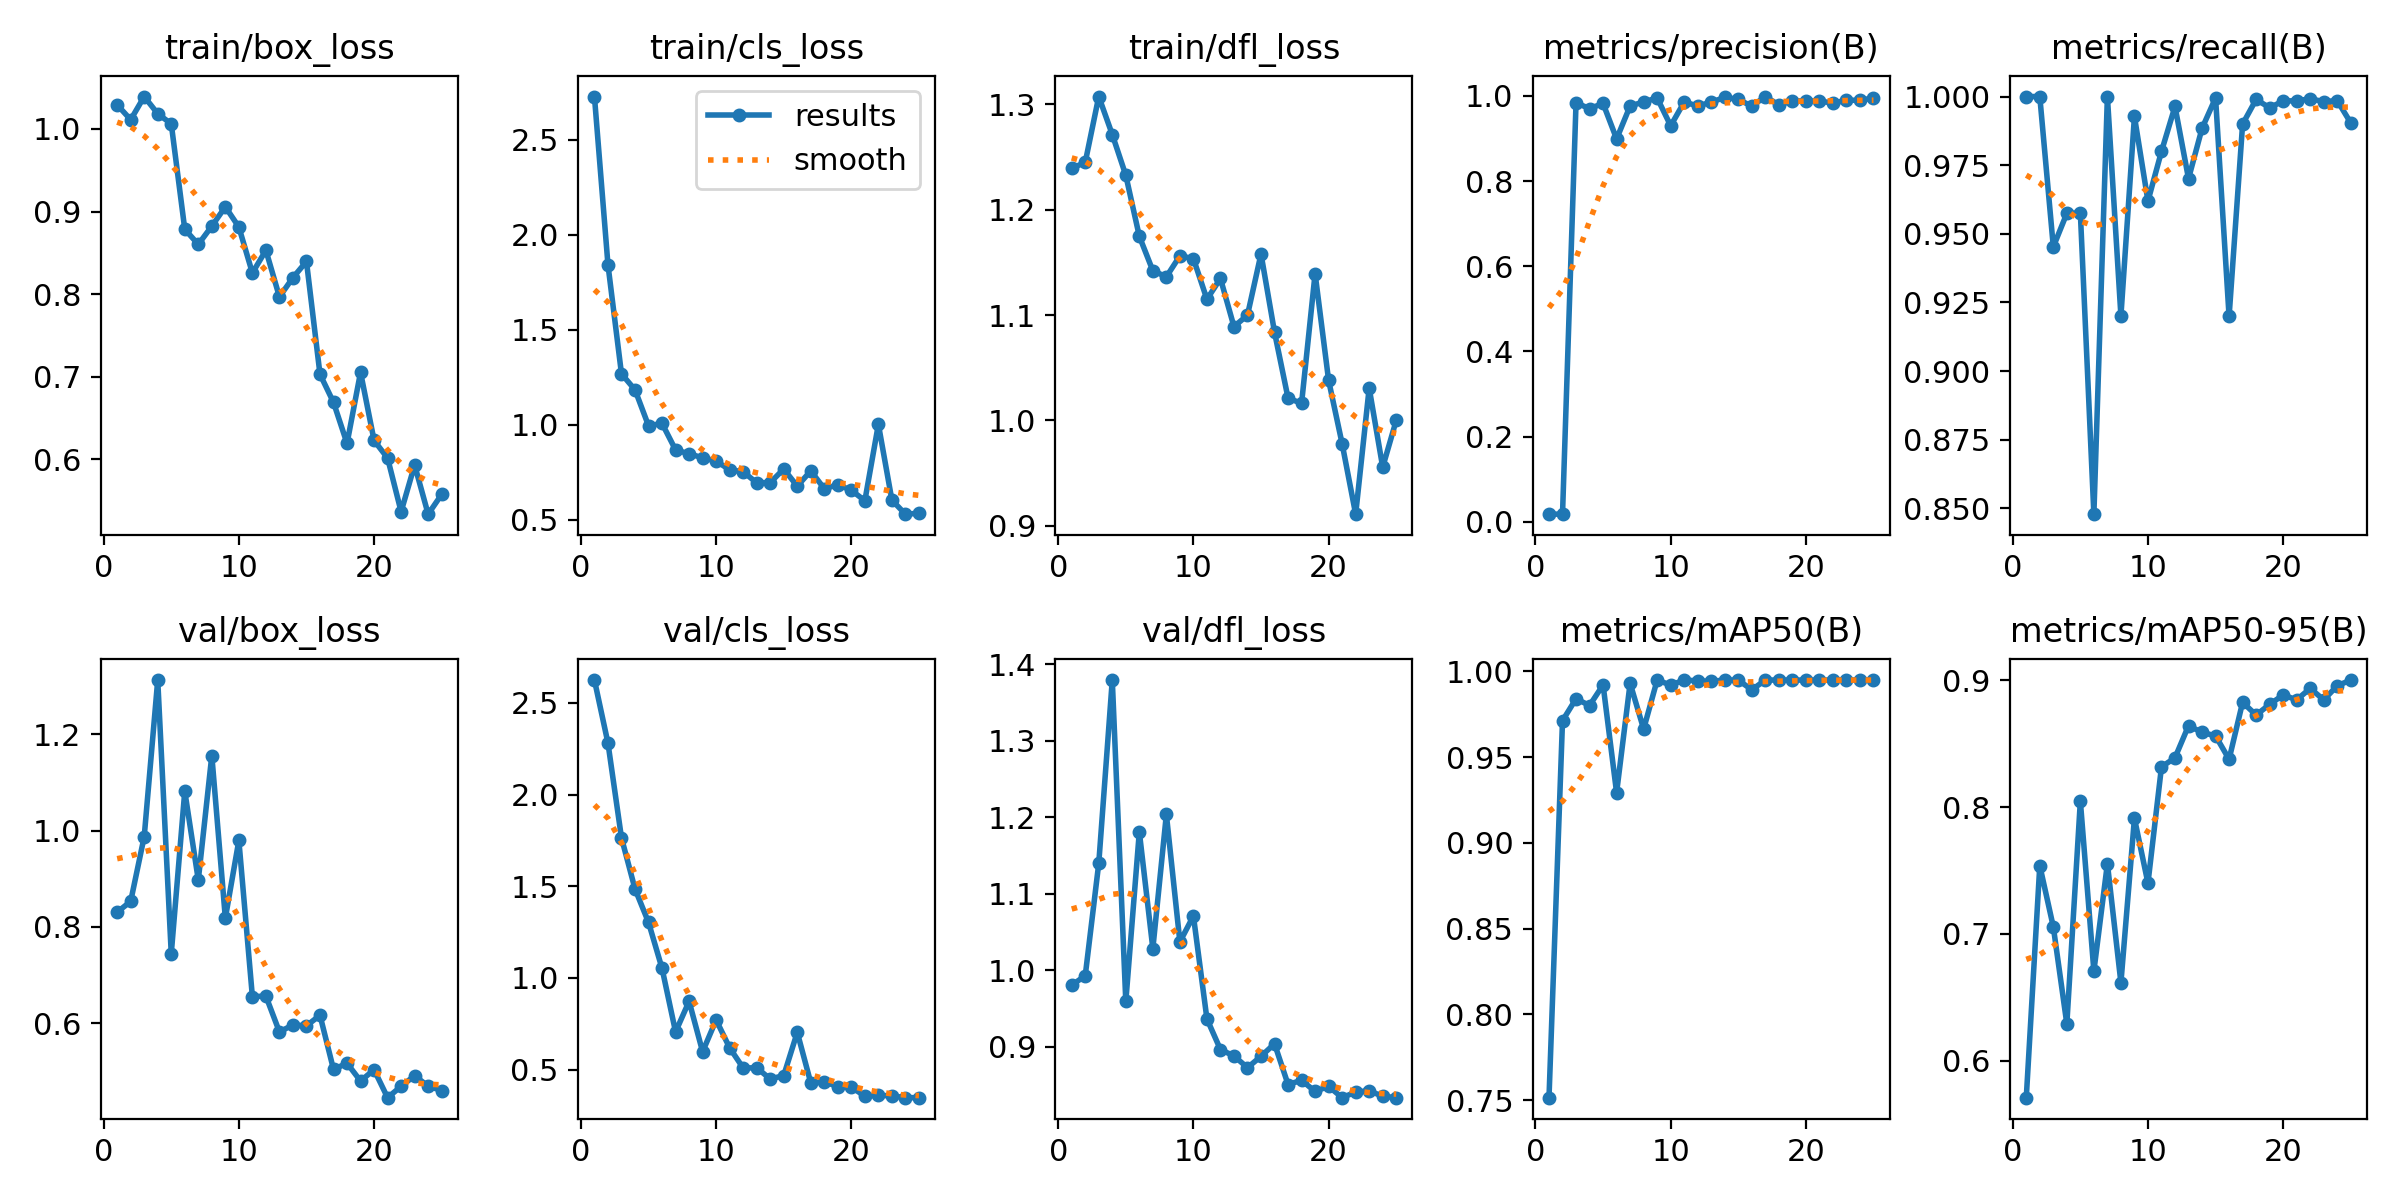

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


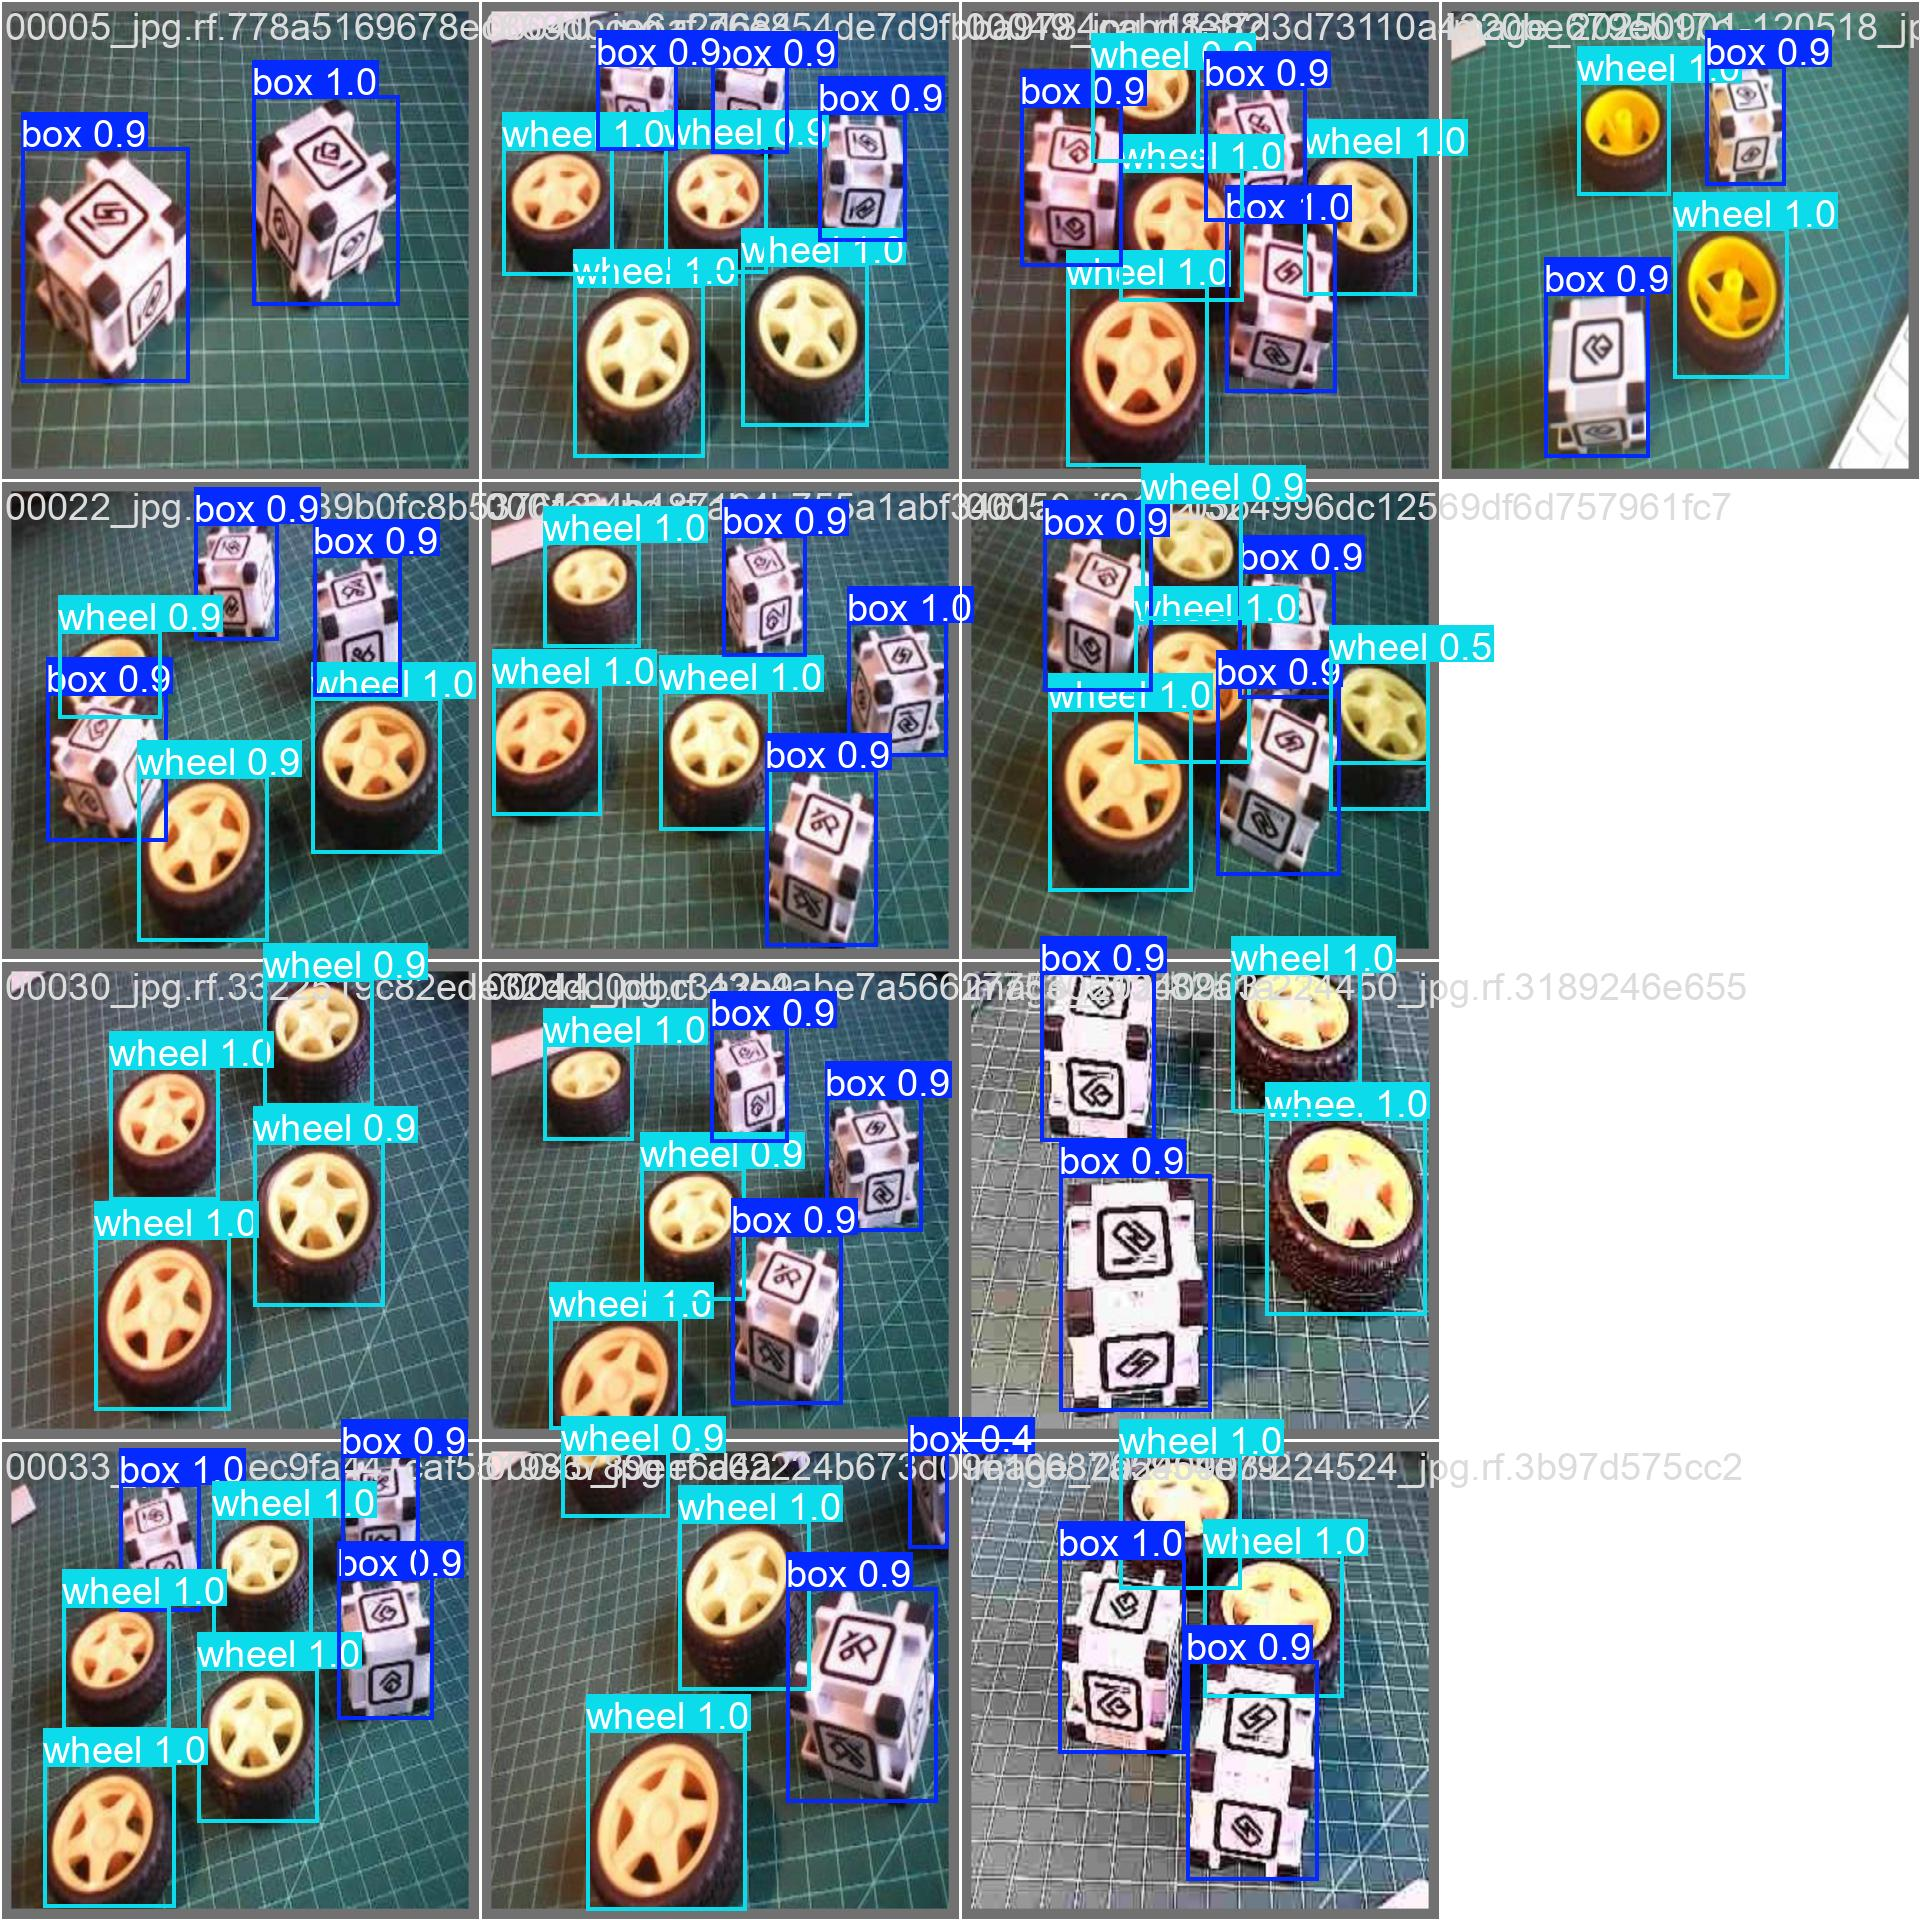

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1091.2±286.7 MB/s, size: 22.9 KB)
val: Scanning /content/datasets/Box-versus-Wheel-auto-dataset-8/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 13/13 251.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.1it/s 0.3s
                   all         13         69      0.996      0.989      0.995        0.9
                   box         12         31          1      0.979      0.995      0.908
                 wheel         12         38      0.993          1      0.995      0.892
Speed: 0.2ms preprocess, 6.9ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/10 /content/datasets/Box-versus-Wheel-auto-dataset-8/test/images/00000_jpg.rf.2f7c3219e7390eaab4a33650b4472d9f.jpg: 640x640 1 box, 11.5ms
image 2/10 /content/datasets/Box-versus-Wheel-auto-dataset-8/test/images/00012_jpg.rf.970f60bdf168959e0e76e53b0042c7a9.jpg: 640x640 3 boxs, 1 wheel, 8.3ms
image 3/10 /content/datasets/Box-versus-Wheel-auto-dataset-8/test/images/00017_jpg.rf.e832dd537bd2a42809089d86add8c127.jpg: 640x640 1 box, 3 wheels, 7.9ms
image 4/10 /content/datasets/Box-versus-Wheel-auto-dataset-8/test/images/00018_jpg.rf.33dee023fbc06c2c9e2bba6f7eefcda7.jpg: 640x640 1 box, 4 wheels, 7.9ms
image 5/10 /content/datasets/Box-versus-Wheel-auto-dataset-8/test/images/00046_jpg.rf.5205b72a3a5d9cd289a972e3b175942e.jpg: 640x640 3 boxs, 4 wheels, 7.9ms
image 6/10 /content/datasets/Box-versus-Wheel-auto-datase

**NOTE:** Let's take a look at few results.

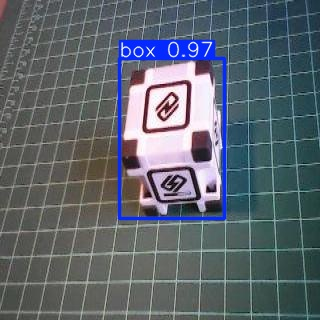

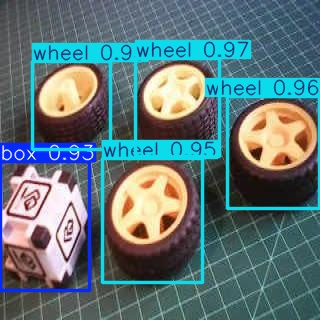

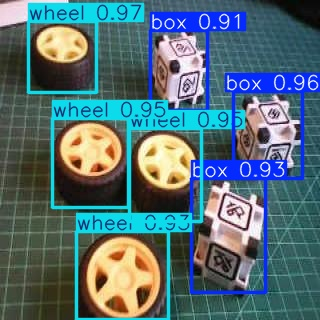

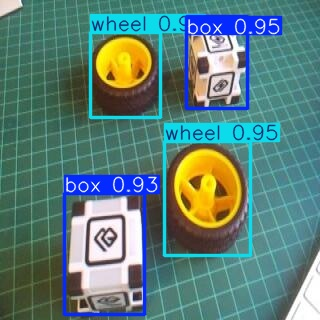

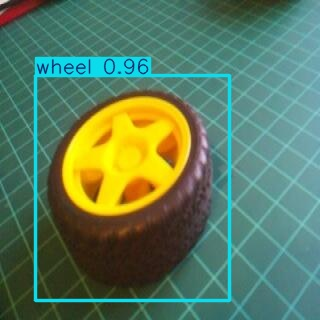

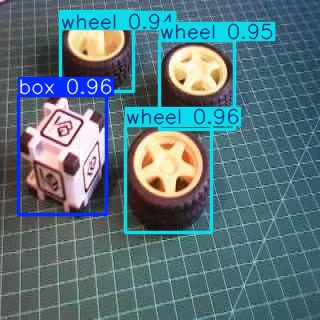

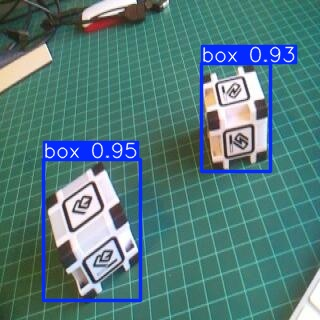

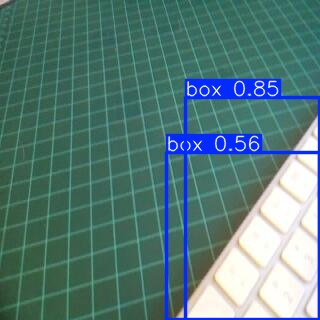

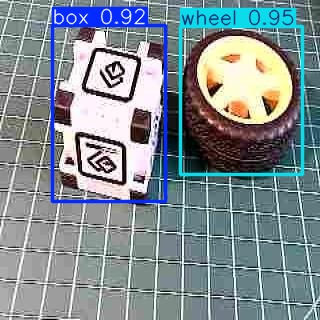

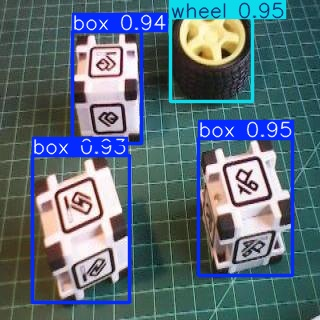

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Export the Training Result to the Gdrive

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
/content/gdrive/MyDrive/10_UNIFEI/IESTI05-Box-Wheel-2025

In [16]:
!scp -r /content/runs '/content/gdrive/MyDrive/10_UNIFEI/IESTI05-Box-Wheel-2025'